In [28]:
from keras.layers import Dense,Activation
from keras.layers.recurrent import SimpleRNN
from keras.models import Sequential
from keras.utils import plot_model
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.utils import to_categorical
import random

In [8]:
owner=np.load("../data/generate_data/owner")

In [23]:
SEQLEN=10
STEP=1

input_owner=[]
label_owner=[]
for i in range(0,len(owner)-SEQLEN,STEP):
    input_owner.append(owner[i:i+SEQLEN])
    label_owner.append(owner[i+SEQLEN])

In [39]:
OWNER_TYPE=5
X=np.zeros((len(input_owner),SEQLEN,OWNER_TYPE),dtype=np.bool)
y=np.zeros((len(input_owner),OWNER_TYPE),dtype=np.bool)
for i,input_ow in enumerate(input_owner):
    for j,ow in enumerate(input_ow):
        X[i,j,ow]=1
    y[i,label_owner[i]]=1

In [68]:
HIDDEN_SIZE=32
BATCH_SIZE=32
NUM_ITERATION=25
NUM_EPOCHS_PER_ITERATION=1
NUM_PREDS_PER_EPOCHS=10

model=Sequential()
model.add(SimpleRNN(HIDDEN_SIZE,return_sequences=False,input_shape=(SEQLEN,OWNER_TYPE),unroll=True))
model.add(Dense(OWNER_TYPE))
model.add(Activation("softmax"))

model.compile(loss="categorical_crossentropy",optimizer="rmsprop",metrics=['acc'])

In [69]:
plot_model(model,to_file="../img/owner_SimpleRNN_model.png",show_shapes=True)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_12 (SimpleRNN)    (None, 32)                1216      
_________________________________________________________________
dense_12 (Dense)             (None, 5)                 165       
_________________________________________________________________
activation_12 (Activation)   (None, 5)                 0         
Total params: 1,381
Trainable params: 1,381
Non-trainable params: 0
_________________________________________________________________


In [70]:
X_val=np.zeros((5,SEQLEN,OWNER_TYPE))
y_val=np.zeros((5,OWNER_TYPE))
for i in range(5):
    r=random.randint(0,500)
    for j in range(SEQLEN):
        X_val[i,j,(i*j+r)%5]=1
    y_val[i,(i*SEQLEN+r)%5]=1


history=model.fit(X,y,batch_size=BATCH_SIZE,epochs=7,validation_data=(X_val,y_val))

Train on 1773 samples, validate on 5 samples
Epoch 1/7
1773/1773 [==============================] - 1s 347us/step - loss: 0.9907 - acc: 0.6858 - val_loss: 1.2957 - val_acc: 0.6000
Epoch 2/7
1773/1773 [==============================] - 0s 98us/step - loss: 0.3304 - acc: 0.9543 - val_loss: 0.7316 - val_acc: 0.8000
Epoch 3/7
1773/1773 [==============================] - 0s 103us/step - loss: 0.1342 - acc: 0.9825 - val_loss: 0.4050 - val_acc: 0.8000
Epoch 4/7
1773/1773 [==============================] - 0s 101us/step - loss: 0.0960 - acc: 0.9820 - val_loss: 0.2501 - val_acc: 1.0000
Epoch 5/7
1773/1773 [==============================] - 0s 104us/step - loss: 0.0846 - acc: 0.9831 - val_loss: 0.1892 - val_acc: 1.0000
Epoch 6/7
1773/1773 [==============================] - 0s 94us/step - loss: 0.0780 - acc: 0.9831 - val_loss: 0.2201 - val_acc: 1.0000
Epoch 7/7
1773/1773 [==============================] - 0s 95us/step - loss: 0.0724 - acc: 0.9842 - val_loss: 0.2311 - val_acc: 0.8000


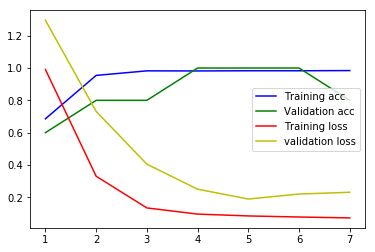

In [71]:
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(acc)+1)

plt.plot(epochs,acc,'b',label="Training acc")
plt.plot(epochs,val_acc,'g',label="Validation acc")
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'y',label="validation loss")

plt.legend()
#plt.figure()
plt.savefig("../img/owner_SimpleRNN.png")
#plt.show()

In [72]:
model.save("../model/owner_SimpleRNN.h5")
model_r=load_model("../model/owner_SimpleRNN.h5")

In [74]:
import predict
import imp
imp.reload(predict)

<module 'predict' from '/home/drdh/lx/X-dll/LSTM/model/model_src/predict.py'>

In [82]:
predict.network([10,11,12,3],36,1,[1,4],34,1,1,[18,6,2,17],[18,6,2,7],[18,6,2,7],1)

([0, 0, 0, 1, 2, 0, 0, 0, 0, 0],
 1,
 1,
 [0, 0, 1, 0, 0],
 0,
 1,
 1,
 [0, 0, 0, 0],
 [0, 0, 0, 1],
 [0, 0, 1, 0],
 1)